# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Deon Schoeman  
**Date:** 9/8/2025  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [2]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization
library(readxl)
# Check current working directory
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/assignment-2-DeonSchoeman/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [3]:
# Import the messy sales dataset
messy_sales <- read_csv("/workspaces/assignment-2-DeonSchoeman/data/messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print(paste("Column names:", names(messy_sales), collapse = ", "))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
[1] "Column names: TransactionID, Column names: Customer_Name, Column names: Product_Category, Column names: Sales_Amount, Column names: Purchase_Date, Column names: Quantity"


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [4]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [5]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

1. Missing values on transaction ID 1 Purchase date and Customer names
2. Outliers on transaction ID 3 quantity is -1. Outlier on transaction ID 4 sales amount is 5,000. Outlier on Transaction ID 5 quantity is 100.
3. Product category transaction ID 10 electronics is lower case when all other entries are capitalized.
4. Be better to set up the dates to be month/day/year to make it easier to read. Also sales amount can limit the decimal places being used to be a better representation.
5. Yes, transaction ID 3 quantity has a negative value and transaction ID 5 quantity is 100.

ERROR: Error in parse(text = input): <text>:1:1: unexpected '^'
1: **
    ^


---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [5]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales)) # YOUR CODE HERE

# TODO: Calculate missing values per column
missing_per_column <- sapply(messy_sales, function(x) sum(is.na(x))) # YOUR CODE HERE

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ] # YOUR CODE HERE

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8

In [6]:
"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

ERROR: Error in parse(text = input): <text>:2:2: unexpected ','
1: "#### 2.2 Missing Value Treatment - Option A (Removal)
2: ",
    ^


In [7]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales) # YOUR CODE HERE

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [8]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [9]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
                                            ### Hint: Use unique(), tabulate(), match(), and which.max()
}

In [10]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- messy_sales %>%
    mutate(Customer_Name = ifelse(is.na(Customer_Name), get_mode(Customer_Name[!is.na(Customer_Name)]), Customer_Name)) # nolint

print("Data after mode imputation for Customer_Name:")
print(sales_imputed$Customer_Name)

[1] "Data after mode imputation for Customer_Name:"


# A tibble: 200 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 John Smith    Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9             9 Jane Doe      Clothing                 793. 2023-08-13   
10            10 Jane Doe      electronics              649. 2023-10-16   
# ℹ 190 more rows
# ℹ 1 more variable: Quantity <dbl>


In [11]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- messy_sales %>%
    mutate(Quantity= ifelse(is.na(Quantity), median(Quantity, na.rm = TRUE), Quantity))

print("Data after median imputation for Quantity:")
print(sales_imputed$Quantity) 

[1] "Data after median imputation for Quantity:"
# A tibble: 200 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2             2 Alice Brown   Clothing                 573. 2023-10-21   
 3             3 Jane Doe      Electronics              488. 2023-12-28   
 4             4 Jane Doe      Electronics             5000  2023-06-16   
 5             5 John Smith    Books                    344. 2023-05-05   
 6             6 John Smith    Books                    435. 2023-11-28   
 7             7 Jane Doe      Home                     489. 2023-08-17   
 8             8 Jane Doe      Electronics              537. 2023-05-17   
 9             9 Jane Doe      Clothing                 793. 2023-08-13   
10            10 Jane Doe      electronics              649. 2023-10-16   
# ℹ 190 more rows
# ℹ 1 more va

In [12]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    TransactionID    Customer_Name Product_Category 
               0                0                0                0 
    Sales_Amount    Purchase_Date         Quantity Product_Category 
              22               14                0                0 
    Sales_Amount    Purchase_Date    TransactionID    Customer_Name 
              22               14                0               16 
Product_Category     Sales_Amount    Purchase_Date         Quantity 
               0               22               14                0 


In [13]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [14]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [15]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [16]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

It really depends on what data you are trying to answer with the data set. If trying to be precise with the data maybe it would be better to remove the rows with incomplete data.
If all we are trying to do is get a educated guess or ball park information replacing information. Then I would say replacing a small amount of information would be ok.

2. **What are the trade-offs between removal and imputation?**

If you remove to much data there might be a whole bunch holes in the data, and you won't get a true representation of the data. Same thing if you replace to much information
the data will eventually skew in the wrong direction, and can draw wrong conclusions.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [18]:
"#### 3.1 Outlier Detection Using IQR Method",

Apply the interquartile range method to identify outliers in Sales_Amount.

ERROR: Error in parse(text = input): <text>:1:46: unexpected ','
1: "#### 3.1 Outlier Detection Using IQR Method",
                                                 ^


In [17]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE) # 25th percentile
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE) # 75th percentile  
IQR_sales <- Q3_sales - Q1_sales # Interquartile range

In [18]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [19]:
### TODO: Identify outliers
outliers <- sales_imputed %>%
    filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
# A tibble: 6 × 6
  TransactionID Customer_Name$TransactionID Product_Category Sales_Amount
          <dbl>                       <dbl> <chr>                   <dbl>
1             4                           4 Electronics              5000
2            46                          46 Books                    8000
3            96                          96 electronics             50000
4           146                         146 ELECTRONICS             12000
5           167                         167 Electronics            100000
6           177                         177 ELECTRONICS             25000
# ℹ 7 more variables: Customer_Name$Customer_Name <chr>,
#   $Product_Category <chr>, $Sales_Amount <dbl>, $Purchase_Date <date>,
#   $Quantity <dbl>, Purchase_Date <date>, 

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


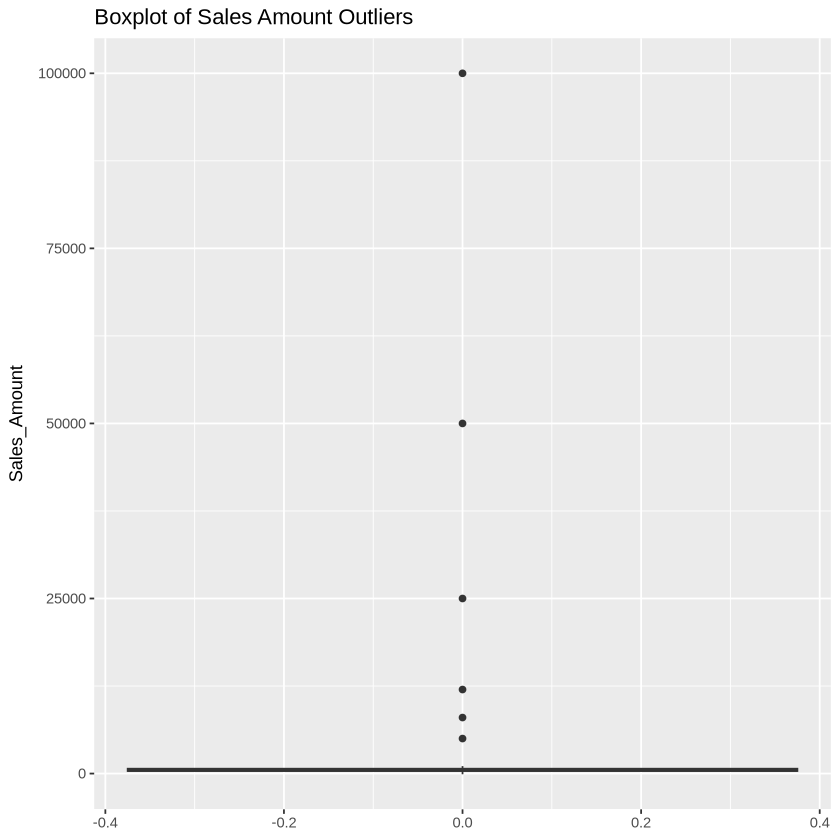

In [20]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Boxplot of Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [21]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
    filter(Sales_Amount <= upper_threshold & Sales_Amount >= lower_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


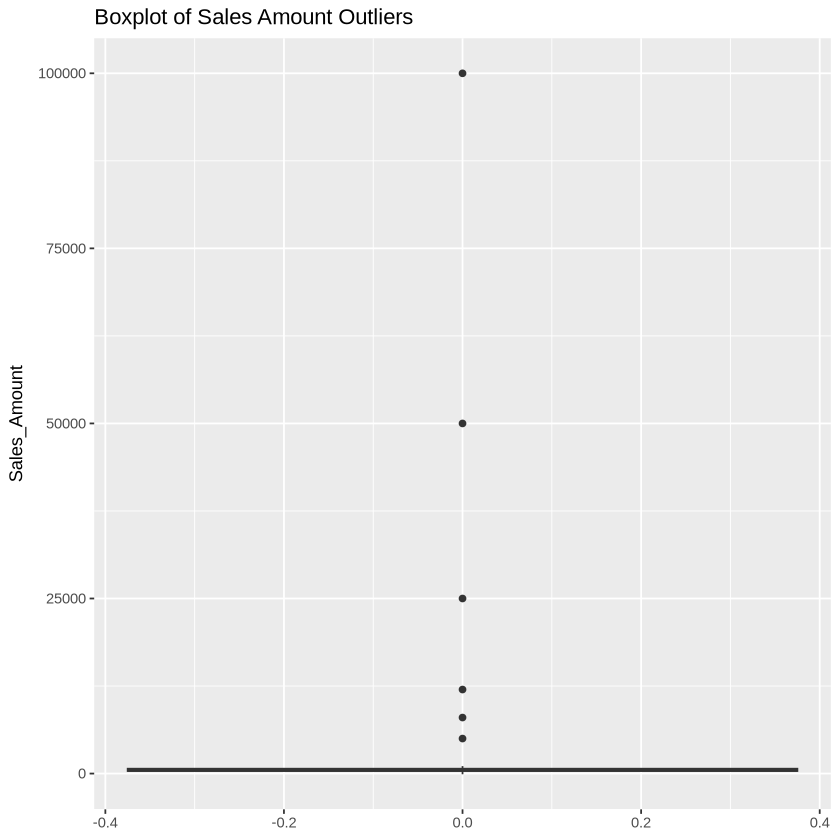

In [22]:
# Student Note: Deon Schoeman - Created this on a previous step.
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
## boxplot_sales
## ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [23]:
## Student Note: Deon Schoeman- Created this on a previous step.
### TODO: Remove outliers from the imputed dataset
#sales_outliers_removed <- # YOUR CODE HERE
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


In [24]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

#Student Note: Deon Schoeman - Just testing out below
sales_outliers_capped_test <- sales_imputed

In [25]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped <- sales_imputed %>%
    mutate(Sales_Amount = ifelse(Sales_Amount > upper_threshold, upper_threshold,
                                    ifelse(Sales_Amount < lower_threshold, lower_threshold, Sales_Amount)))


## Student Note: Deon Schoeman - This is to test out capping user values.

upper_threshold_test = 50000
lower_threshold_test = 0

sales_outliers_capped_test <- sales_imputed %>%
    mutate(Sales_Amount = ifelse(Sales_Amount > upper_threshold_test, upper_threshold_test,
                                    ifelse(Sales_Amount < lower_threshold_test, lower_threshold_test, Sales_Amount)))

### Hint: Use ifelse() to replace values above/below thresholds

In [26]:
### Verify capping worked
print("Sales Amount After Capping Outliers")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))
print("Sales Amount Capped On Test")
print(range(sales_outliers_capped_test$Sales_Amount, na.rm = TRUE)) 

[1] "Sales Amount After Capping Outliers"
[1] -100.000 1192.331
[1] "Sales Amount Capped On Test"
[1]     0 50000


In [27]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
    filter(Sales_Amount > upper_threshold & Sales_Amount < lower_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [28]:
# TODO: Choose your final cleaned dataset
# Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped
final_dataset <- sales_outliers_removed

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 172   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -100.0   361.8   517.8   508.4   680.2  1058.3 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

It all honestly depends on what questions are trying to be answered. Removing data one way or another is going to skew results, and depends on if a ball-park answer or a precise answer is
needed for the question thats needs to be answered. Out of the data sets worked on during this homework. I would say the sales_outliers_removed would be the choice I make. Yes, it did remove outlier data; however, I do think it focuses more on frequently occurring data, and centralizes the data spread a bit. Having the data in a more centralized spread we could make a good ball park estimate on the data set. Although I would like to explore a mixture of the two datasets from removing the outliers and removing the NA rows, and what that data set would look like. 

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [30]:
# Create comparison summary

outliers_final_dataset <- final_dataset %>%
    filter(Sales_Amount > upper_threshold & Sales_Amount < lower_threshold)

comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    nrow(outliers)
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    nrow(outliers_final_dataset)
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows        200.00     172.00
2      Missing Values         52.00      50.00
3   Mean Sales_Amount       1614.91     508.45
4 Median Sales_Amount        531.29     517.84
5            Outliers          6.00       0.00


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

It could be incomplete data, from sales that have not gone through/finalized yet, to new customers and still building their files, to deals that never went through. So deleting the data would help with current sales trends that have gone through. Another scenario would be for medical research purposes that have to be reported to the government. Where complete data is necessary.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

Depends on what context the outliers are. Was there a high sales amount but low sales associated with it? Was there a large discount added to this sale to get a new customer on board? They could also include incomplete sales, accidental default values, misrepresented sales, and possibly theft could be occurring.


### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

It can cause wrong answers, that could lead to investing more in the wrong areas, products, and future purchasing. The values can also skew the averages around and not get as close to true as what it could be.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

If we remove too much data we could alter the results, and create a false representation of the data. Also have to be careful about removing data just because we don't like the way it looks. We could be introducing our own bias into the data and skewing it. This could lead to businesses making wrong decisions based on the data. 

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**